## Medical Appointment Using Decision Tree and Random Classifier Models

#### By the end of this mini project, you are supposed to deliver within your code:
#### Multiple accuracy measures resembling different criteria used for training your decision tree classifiers.
#### Multiple accuracy measures resembling a different number of estimators used for your random forest classifiers.
#### One printed confusion matrix for the best model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Medical.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()  #new dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#Dropping the following irrelevant columns
df.drop(columns = ['PatientId', 'AppointmentID', 'Neighbourhood', 'ScheduledDay', 'AppointmentDay'], axis = 1, inplace=True)

In [6]:
df.head(2)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No


In [7]:
#Encoding Target and Categorical columns
df['No-show'] = LabelEncoder().fit_transform(df['No-show'])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

df.head(2)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,62,0,1,0,0,0,0,0
1,1,56,0,0,0,0,0,0,0


In [8]:
#Correcting Spelling Error of columns - Hipertension and Handcap
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'})

[Text(0, 0, 'Yes'), Text(1, 0, 'Noe')]

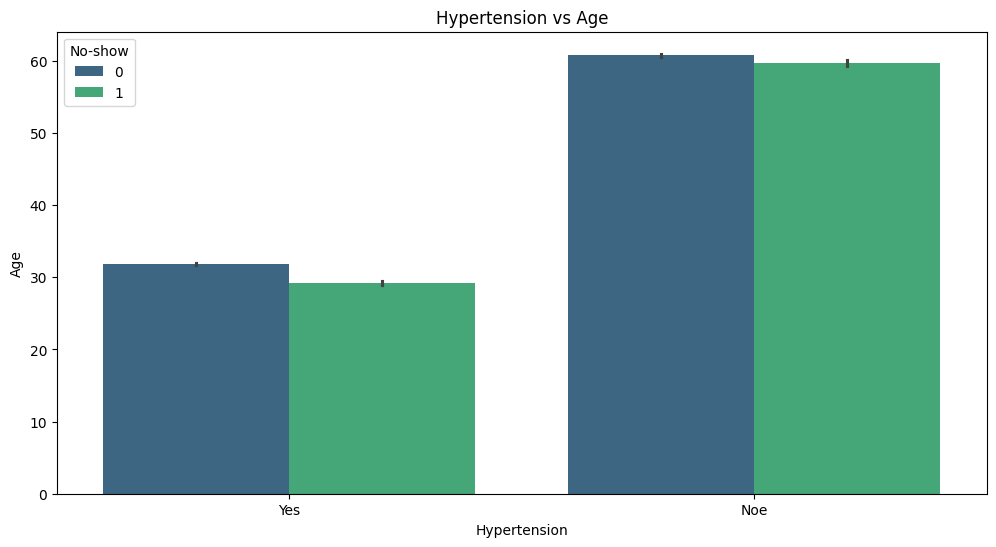

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(12, 6))
sn.barplot(ax=axs, x="Hypertension", y="Age", hue="No-show", data=df, palette="viridis")

# Titles and Labels
axs.set_title("Hypertension vs Age")
axs.set_xlabel("Hypertension")
axs.set_ylabel("Age")

new_labels = ['Yes', 'Noe']  # Rename the labels
axs.set_xticklabels(new_labels)


In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [11]:
#splits the .20 test_size into .50 i.e 10% of test size
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size =0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

### Decision Tree Classifier

In [13]:
##Using Decision Tree Classier
# Try different criteria and evaluate performance
criteria = ['gini', 'entropy']
max_leaf_nodes_list = [100, 1000]  # Loop over these values
best_criterion = None
best_max_leaf_nodes = None 
best_accuracy = 0

for criterion in criteria:
      for max_leaf_nodes in max_leaf_nodes_list:
        # Train Decision Tree with the current criterion and max_leaf_nodes
        modelDT = DecisionTreeClassifier(criterion=criterion, max_leaf_nodes=max_leaf_nodes, random_state=42)
        modelDT.fit(X_train, y_train)
        
        # Predict on validation set
        y_pred = modelDT.predict(X_test)
        
        # Compute accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Criterion: {criterion}, Max Leave Nodes: {max_leaf_nodes}, Accuracy: {accuracy:.3f}")
        
        # Track the best criterion
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_criterion = criterion
            best_max_leaf_nodes = max_leaf_nodes
            

print(f"\n Best criterion: {best_criterion}, Best max_leaf_nodes: {best_max_leaf_nodes}, with accuracy {best_accuracy:.3f}")

Criterion: gini, Max Leave Nodes: 100, Accuracy: 0.797
Criterion: gini, Max Leave Nodes: 1000, Accuracy: 0.795
Criterion: entropy, Max Leave Nodes: 100, Accuracy: 0.797
Criterion: entropy, Max Leave Nodes: 1000, Accuracy: 0.795

 Best criterion: gini, Best max_leaf_nodes: 100, with accuracy 0.797


In [14]:
## Set-up 'Result' visualization:

def plotResults(best_y_pred):
    plt.figure(figsize=(10, 3))
    sn.scatterplot(data=df, x="Age", y="Diabetes", hue="No-show", palette="coolwarm", s=100, edgecolor="black")#, label="Actual")
    
    # Overlay predictions with different markers
    sn.scatterplot(x= X_test[:,1], y=X_test[:,4], hue=best_y_pred, palette="coolwarm",  s=50, marker="X", edgecolor="black")#, label="Predicted")
    
    # Labels and title
    plt.xlabel("Age")
    plt.ylabel("Diabetes")
    plt.title("Classification Scatter Plot: Actual vs. Predictions")
    plt.legend()
    plt.show()


 Best criterion: gini, Best max_leaf_nodes: 100, Final Accuracy: 0.797


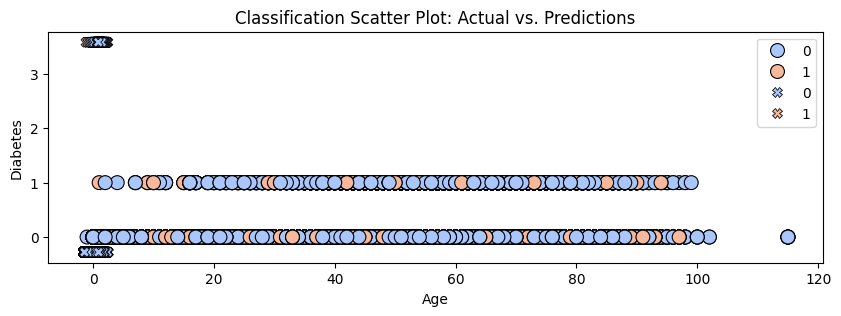

In [15]:
#Accuracy Score of the best criterion
best_model = DecisionTreeClassifier(criterion = best_criterion, max_leaf_nodes = best_max_leaf_nodes, random_state=42)
best_model.fit(X_train, y_train) 
best_y_pred = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, best_y_pred)
print(f"\n Best criterion: {best_criterion}, Best max_leaf_nodes: {best_max_leaf_nodes}, Final Accuracy: {final_accuracy:.3f}")
plotResults(best_y_pred)

In [16]:
print(classification_report(y_test, best_y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, best_y_pred))
print(f"\nFinal Accuracy: {final_accuracy:.2f}")

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      8805
           1       0.68      0.01      0.01      2248

    accuracy                           0.80     11053
   macro avg       0.74      0.50      0.45     11053
weighted avg       0.77      0.80      0.71     11053


Confusion Matrix:
[[8799    6]
 [2235   13]]

Final Accuracy: 0.80


Text(0.5, 1.0, 'Medical Appointment')

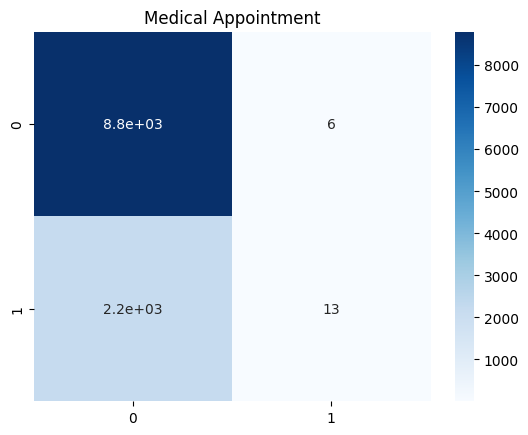

In [17]:
sn.heatmap(confusion_matrix(y_test, best_y_pred), annot = True, cmap='Blues').set_title("Medical Appointment")

### Using Random Forest Classifier

In [18]:
# Try different criteria and evaluate performance
criteria = ['gini', 'entropy']
n_estimators_range = [50, 100, 150, 200]  # Number of trees from 50 to 250 in steps of 50
max_depth_list = [5, 10, 20, None]  # None = unlimited depth
max_features_list = ['sqrt', 'log2', None]  # Number of features considered for splitting

best_n_estimators = 0 
best_criterion = None
best_max_leaf_nodes = None 
best_max_depth = None
best_max_features = None
best_accuracy = 0

for criterion in criteria:
    for n_estimators in n_estimators_range:
        for max_depth in max_depth_list:
            for max_features in max_features_list:
                # Train Random Forest with current parameters
                modelRF = RandomForestClassifier(criterion=criterion, n_estimators=n_estimators, 
                                                 max_depth=max_depth, max_features=max_features, random_state=42)
                modelRF.fit(X_train, y_train)
                
                # Predict on validation set
                prediction = modelRF.predict(X_test)
                
                # Compute accuracy
                  
                # Track the best parameters
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_criterion = criterion
                    best_n_estimators = n_estimators
                    best_max_depth = max_depth
                    best_max_features = max_features           
                                                 


In [19]:
#Train and evaluate the best model
final_model = RandomForestClassifier(criterion=best_criterion, 
                                     n_estimators=best_n_estimators, 
                                     max_depth=best_max_depth, 
                                     max_features=best_max_features, 
                                     random_state=42)
final_model.fit(X_train, y_train)

# Predict and calculate accuracy
final_predictions = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)

In [20]:
print(f"\n Best criterion: {best_criterion}, Best trees: {best_n_estimators}, Best max_depth: {best_max_depth}, Best max_features: {best_max_features}, Final Accuracy: {final_accuracy:.3f}")


 Best criterion: gini, Best trees: 50, Best max_depth: 5, Best max_features: sqrt, Final Accuracy: 0.797


### Random Forest Single Codes

Model Score = 0.7921831177056002


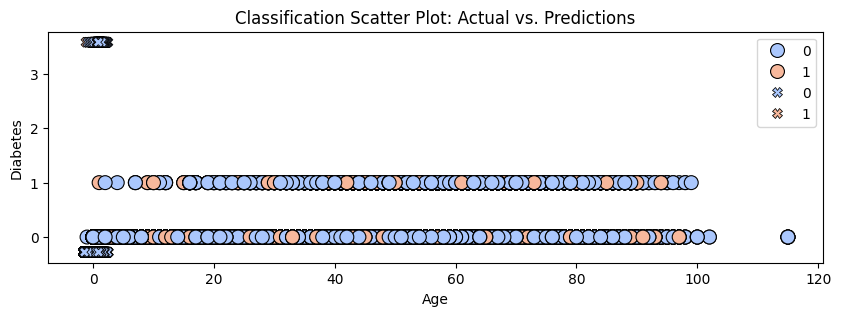

In [21]:
model_RF = RandomForestClassifier(n_estimators = 10, # Default is 100
                                  bootstrap = True) # If false, then all features will be used in each tree ("bagging")
                                                    # class_weight allows you to add weighting ("boosting")   
model_RF.fit(X_train, y_train)

predictions_RF = model_RF.predict(X_test)
print("Model Score =",model_RF.score(X_test,y_test))
plotResults(predictions_RF)